<div class = "page-header">
    <h1 class = "alert alert-info">
    Reducing dimensionality<br/>
    <small>
        Gabriel azevedo Ferreira - started 1-24-2017<br/>
        From : Reducing dimensionality and applying hierarchical clustering
    </small>
    </h1> 
</div>
<div class = "page-header">
This template does dimension reduction over the total data per player divided by the total minutes played.<br/>


<div class = "page-header"></div>
<center><h3>(Not so good results, if we are goint to keep it, we need to rethink the analysis)</h3></center>
</div>

<div class="alert alert-success">
    <h2>
        Imports
    </h2>
</div>
<h4 class="alert alert-warning">Importing libraries and checking working directory</h4>


## Basketbal positions
* **Center**: Usually the tallest player. Position demands a lot of physical contact. On offense, receives ball and shoots close to the basket. Serves as the last line of defense, blocking opponents’ shots and rebounding their misses.

* **Power Forward**: Tall player who relies on strength and toughness to control activity in the lane. Frequently rebounds, especially on defense. Has a decent shot from short-range and scores many points by rebounding missed shots and quickly shooting them.

* **Small Forward**: Versatile and very athletic player. Aggressively attacks the defense by driving and cutting towards the basket, but also has a consistent outside shot.

* **Shooting Guard**: A tenacious defender with an aptitude for stealing the ball. On offense, serves as the secondary ball handler and sharpshooter. Has the ability to convert shots from three-point range.

* **Point Guard**: Leader of offense who uses superb passing and dribbling skills to set up teammates for open shots. Has a reliable jump shot and ability to break down a defense by driving into the lane.

## Feature definition

* **GP **:
    Games Played
* **W**:
    Wins
* **L**:
    Losses
* **MIN**:
    Minutes Played
* **FGM**:
    Field Goals Made
* **FGA**:
    Field Goals Attempted
* **FG%**:
    Field Goal Percentage
* **3PM**:
    3 Point Field Goals Made
* **3PA**:
    3 Point Field Goals Attempted
* **3P%**:
    3 Point Field Goals Percentage
* **FTM**:
    Free Throws Made
* **FTA**:
    Free Throws Attempted
* **FT%**:
    Free Throw Percentage
* **OREB**:
    Offensive Rebounds
* **DREB**:
    Defensive Rebounds
* **REB**:
    Rebounds
* **AST**:
    Assists
* **TOV**:
    Turnovers
* **STL**:
    Steals
* **BLK**:
    Blocks
* **PF**:
    Personal Fouls
* **DD2**:
    Double doubles
* **TD3**:
    Triple doubles
* **PTS**:
    Points
* **+/-**:
    Plus Minus

In [25]:
import pandas as pd
import numpy as np
import os
print os.getcwd();

# import libraries for visualization
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

#import libraries for features decomposition
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

/home/jarvis/Documents/Git/TDA-NBA/notebooks/DimReduction


<h4 class="alert alert-warning"/> Setting up visualization parameters

In [26]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

<h4 class="alert alert-warning"/>Importing Data

In [27]:
#import data
df = pd.read_csv('../../Data/NBA-data-With-Positions.csv')
print "(rows,cols) =",df.shape
# as we will transform the variable sallary, we split it from the rest of the dataset
sal = df['SALARY']
df = df.drop('SALARY',1)

# We also drop the 'Unnamed 0' column
df = df.drop('Unnamed: 0',1)
df

(rows,cols) = (476, 31)


,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,Aaron Brooks,CHI,31,69,36,33,16.1,2.7,6.8,40.1,1.0,2.7,35.7,0.7,0.9,76.6,0.3,1.2,1.5,2.6,1.2,0.4,0.1,1.9,0,0,7.1,-0.1,PG
1,Aaron Gordon,ORL,20,78,32,46,23.9,3.5,7.4,47.3,0.5,1.8,29.6,1.7,2.5,66.8,2.0,4.5,6.5,1.6,0.8,0.8,0.7,2.0,12,0,9.2,-1.0,PF
2,Aaron Harrison,CHA,21,21,15,6,4.4,0.2,0.9,26.3,0.1,0.5,30.0,0.2,0.6,41.7,0.2,0.5,0.7,0.1,0.2,0.3,0.0,0.5,0,0,0.9,-0.3,SG
3,Adreian Payne,MIN,25,52,18,34,9.3,1.0,2.8,36.6,0.2,0.6,28.1,0.3,0.5,65.4,0.4,1.8,2.1,0.6,0.7,0.3,0.2,1.5,0,0,2.5,-2.3,PF
4,Al Horford,ATL,30,82,48,34,32.1,6.5,12.8,50.5,1.1,3.1,34.4,1.3,1.6,79.8,1.8,5.5,7.3,3.2,1.3,0.8,1.5,2.0,17,0,15.2,2.8,C
5,Al Jefferson,CHA,31,47,33,14,23.3,5.2,10.7,48.5,0.0,0.0,0.0,1.5,2.4,64.9,1.2,5.2,6.4,1.5,0.7,0.6,0.9,2.5,7,0,12.0,1.0,C
6,Al-Farouq Aminu,POR,25,82,44,38,28.5,3.6,8.8,41.6,1.5,4.3,36.1,1.4,1.9,73.7,1.2,4.9,6.1,1.7,1.5,0.9,0.6,2.1,8,0,10.2,0.7,SF
7,Alan Anderson,WAS,33,13,8,5,14.8,1.6,4.5,35.6,0.9,2.8,32.4,0.8,1.2,73.3,0.1,2.0,2.1,1.1,0.2,0.3,0.1,1.9,0,0,5.0,2.3,SG
8,Alan Williams,PHX,23,10,3,7,6.8,1.0,2.4,41.7,0.0,0.0,0.0,0.9,1.4,64.3,1.4,2.4,3.8,0.5,0.6,0.4,0.5,1.5,1,0,2.9,0.1,PF
9,Alec Burks,UTA,24,31,13,18,25.7,4.4,10.8,41.0,1.0,2.5,40.5,3.4,4.5,75.2,0.5,3.0,3.5,2.0,1.6,0.6,0.1,2.3,0,0,13.3,-0.4,SG


In [28]:
df.describe()

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,27.052521,54.785714,27.464286,27.321429,20.157773,3.113235,6.951681,44.315966,0.688025,1.963655,27.020588,1.434874,1.911555,71.973319,0.870378,2.754832,3.620588,1.826261,1.146849,0.653361,0.415126,1.744538,4.424370,0.157563,8.349370,-0.399790
std,4.407574,24.274576,16.478017,15.219228,9.223976,2.053724,4.420890,8.783619,0.713570,1.862574,16.227345,1.307888,1.652358,17.903679,0.775428,1.769210,2.407671,1.756553,0.782957,0.438861,0.448180,0.742706,9.506151,1.136183,5.652556,3.077754
min,19.000000,1.000000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000
25%,24.000000,37.000000,14.000000,15.000000,13.000000,1.500000,3.500000,40.400000,0.100000,0.300000,20.000000,0.575000,0.800000,66.700000,0.300000,1.500000,1.900000,0.675000,0.600000,0.300000,0.100000,1.200000,0.000000,0.000000,4.000000,-2.000000
50%,26.000000,62.000000,28.000000,28.000000,19.950000,2.700000,5.950000,43.900000,0.500000,1.500000,32.350000,1.000000,1.400000,75.400000,0.600000,2.350000,3.100000,1.300000,0.900000,0.600000,0.300000,1.800000,0.000000,0.000000,7.000000,-0.500000
75%,30.000000,76.000000,40.000000,38.000000,28.025000,4.400000,9.600000,48.200000,1.100000,3.125000,36.725000,1.900000,2.600000,82.600000,1.200000,3.600000,4.800000,2.325000,1.500000,0.900000,0.500000,2.200000,4.000000,0.000000,11.625000,1.100000
max,40.000000,82.000000,73.000000,71.000000,42.400000,10.200000,20.500000,100.000000,5.100000,11.200000,100.000000,8.800000,10.200000,100.000000,4.900000,10.300000,14.800000,11.700000,4.600000,2.100000,3.700000,6.000000,66.000000,18.000000,30.100000,13.200000


<h4 class="alert alert-warning">
Dividing data by minute played and taking only players who have played more than a minimal amount of time in the whole season
</h4>

In [29]:
cols_to_normilize =['FGM','FGA','03:00:00 PM','3PA','FTM','FTA','OREB',
                    'DREB','REB','AST','TOV','STL','BLK','PF','DD2','TD3',
                    'PTS','+/-']
df[cols_to_normilize] = df[cols_to_normilize].div(df['MIN'],axis = 0)
df

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev
0,Aaron Brooks,CHI,31,69,36,33,16.1,0.167702,0.422360,40.1,0.062112,0.167702,35.7,0.043478,0.055901,76.6,0.018634,0.074534,0.093168,0.161491,0.074534,0.024845,0.006211,0.118012,0.000000,0.000000,0.440994,-0.006211,PG
1,Aaron Gordon,ORL,20,78,32,46,23.9,0.146444,0.309623,47.3,0.020921,0.075314,29.6,0.071130,0.104603,66.8,0.083682,0.188285,0.271967,0.066946,0.033473,0.033473,0.029289,0.083682,0.502092,0.000000,0.384937,-0.041841,PF
2,Aaron Harrison,CHA,21,21,15,6,4.4,0.045455,0.204545,26.3,0.022727,0.113636,30.0,0.045455,0.136364,41.7,0.045455,0.113636,0.159091,0.022727,0.045455,0.068182,0.000000,0.113636,0.000000,0.000000,0.204545,-0.068182,SG
3,Adreian Payne,MIN,25,52,18,34,9.3,0.107527,0.301075,36.6,0.021505,0.064516,28.1,0.032258,0.053763,65.4,0.043011,0.193548,0.225806,0.064516,0.075269,0.032258,0.021505,0.161290,0.000000,0.000000,0.268817,-0.247312,PF
4,Al Horford,ATL,30,82,48,34,32.1,0.202492,0.398754,50.5,0.034268,0.096573,34.4,0.040498,0.049844,79.8,0.056075,0.171340,0.227414,0.099688,0.040498,0.024922,0.046729,0.062305,0.529595,0.000000,0.473520,0.087227,C
5,Al Jefferson,CHA,31,47,33,14,23.3,0.223176,0.459227,48.5,0.000000,0.000000,0.0,0.064378,0.103004,64.9,0.051502,0.223176,0.274678,0.064378,0.030043,0.025751,0.038627,0.107296,0.300429,0.000000,0.515021,0.042918,C
6,Al-Farouq Aminu,POR,25,82,44,38,28.5,0.126316,0.308772,41.6,0.052632,0.150877,36.1,0.049123,0.066667,73.7,0.042105,0.171930,0.214035,0.059649,0.052632,0.031579,0.021053,0.073684,0.280702,0.000000,0.357895,0.024561,SF
7,Alan Anderson,WAS,33,13,8,5,14.8,0.108108,0.304054,35.6,0.060811,0.189189,32.4,0.054054,0.081081,73.3,0.006757,0.135135,0.141892,0.074324,0.013514,0.020270,0.006757,0.128378,0.000000,0.000000,0.337838,0.155405,SG
8,Alan Williams,PHX,23,10,3,7,6.8,0.147059,0.352941,41.7,0.000000,0.000000,0.0,0.132353,0.205882,64.3,0.205882,0.352941,0.558824,0.073529,0.088235,0.058824,0.073529,0.220588,0.147059,0.000000,0.426471,0.014706,PF
9,Alec Burks,UTA,24,31,13,18,25.7,0.171206,0.420233,41.0,0.038911,0.097276,40.5,0.132296,0.175097,75.2,0.019455,0.116732,0.136187,0.077821,0.062257,0.023346,0.003891,0.089494,0.000000,0.000000,0.517510,-0.015564,SG



<h4 class="alert alert-warning">
Creating a column for the logarithm of tha salaries
</h4>
As we can see below, the growth of the salaries among the players has a exponential shape (once its logarithm is close to linear). We used the linearized version in the dimension reduction algorithms once they are based on linear transformations.
## (justify better than that)

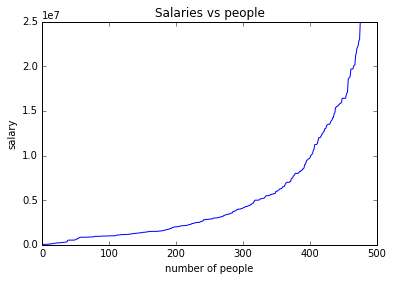

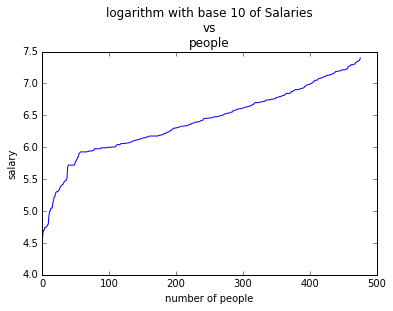

In [30]:
pylab.title("Salaries vs people") 
pylab.xlabel("number of people")
pylab.ylabel("salary")
pylab.plot(sorted(sal.as_matrix()))
pylab.show()

pylab.title("logarithm with base 10 of Salaries\nvs\npeople") 
pylab.xlabel("number of people")
pylab.ylabel("salary")
pylab.plot(np.log10(sorted(sal.as_matrix())))
pylab.show()

In [31]:
df['logSal'] = np.log10(sal.as_matrix())
df.head()

,Player,TEAM,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,PosicAbbrev,logSal
0,Aaron Brooks,CHI,31,69,36,33,16.1,0.167702,0.422360,40.1,0.062112,0.167702,35.7,0.043478,0.055901,76.6,0.018634,0.074534,0.093168,0.161491,0.074534,0.024845,0.006211,0.118012,0.000000,0.0,0.440994,-0.006211,PG,6.352183
1,Aaron Gordon,ORL,20,78,32,46,23.9,0.146444,0.309623,47.3,0.020921,0.075314,29.6,0.071130,0.104603,66.8,0.083682,0.188285,0.271967,0.066946,0.033473,0.033473,0.029289,0.083682,0.502092,0.0,0.384937,-0.041841,PF,6.620311
2,Aaron Harrison,CHA,21,21,15,6,4.4,0.045455,0.204545,26.3,0.022727,0.113636,30.0,0.045455,0.136364,41.7,0.045455,0.113636,0.159091,0.022727,0.045455,0.068182,0.000000,0.113636,0.000000,0.0,0.204545,-0.068182,SG,5.720236
3,Adreian Payne,MIN,25,52,18,34,9.3,0.107527,0.301075,36.6,0.021505,0.064516,28.1,0.032258,0.053763,65.4,0.043011,0.193548,0.225806,0.064516,0.075269,0.032258,0.021505,0.161290,0.000000,0.0,0.268817,-0.247312,PF,6.287542
4,Al Horford,ATL,30,82,48,34,32.1,0.202492,0.398754,50.5,0.034268,0.096573,34.4,0.040498,0.049844,79.8,0.056075,0.171340,0.227414,0.099688,0.040498,0.024922,0.046729,0.062305,0.529595,0.0,0.473520,0.087227,C,7.079181


<h4 class = "alert alert-warning"/> Assign position label for each player <br/> Also taking only numeric values

In [32]:
dict = {' PG': 0, ' PF': 1, ' SG' : 2, ' SF' : 3, ' C' : 4}
invdict = {v: k for k, v in dict.iteritems()}

position_labels = [dict[x] for x in df['PosicAbbrev']]
df_numVar = df.select_dtypes(include=['number'])
df_numVar.head()

,AGE,GP,W,L,MIN,FGM,FGA,FG%,03:00:00 PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,DD2,TD3,PTS,+/-,logSal
0,31,69,36,33,16.1,0.167702,0.422360,40.1,0.062112,0.167702,35.7,0.043478,0.055901,76.6,0.018634,0.074534,0.093168,0.161491,0.074534,0.024845,0.006211,0.118012,0.000000,0.0,0.440994,-0.006211,6.352183
1,20,78,32,46,23.9,0.146444,0.309623,47.3,0.020921,0.075314,29.6,0.071130,0.104603,66.8,0.083682,0.188285,0.271967,0.066946,0.033473,0.033473,0.029289,0.083682,0.502092,0.0,0.384937,-0.041841,6.620311
2,21,21,15,6,4.4,0.045455,0.204545,26.3,0.022727,0.113636,30.0,0.045455,0.136364,41.7,0.045455,0.113636,0.159091,0.022727,0.045455,0.068182,0.000000,0.113636,0.000000,0.0,0.204545,-0.068182,5.720236
3,25,52,18,34,9.3,0.107527,0.301075,36.6,0.021505,0.064516,28.1,0.032258,0.053763,65.4,0.043011,0.193548,0.225806,0.064516,0.075269,0.032258,0.021505,0.161290,0.000000,0.0,0.268817,-0.247312,6.287542
4,30,82,48,34,32.1,0.202492,0.398754,50.5,0.034268,0.096573,34.4,0.040498,0.049844,79.8,0.056075,0.171340,0.227414,0.099688,0.040498,0.024922,0.046729,0.062305,0.529595,0.0,0.473520,0.087227,7.079181


<h2 class="alert alert-success">
        Performing PCA (dim. reduction)
</h2>
<h4 class = "alert alert-warning"/>Scaling data

In [33]:
df_scaled = sk.preprocessing.scale(df_numVar)
df_scaled

array([[ 0.89655488,  0.58617874,  0.51855115, ...,  0.40575705,
         0.21297644, -0.07415518],
       [-1.60177473,  0.95732708,  0.2755481 , ..., -0.0265516 ,
         0.05525835,  0.40020549],
       [-1.37465386, -1.39327911, -0.75721486, ..., -1.41773477,
        -0.06134124, -1.19216574],
       ..., 
       [-1.37465386,  1.1222819 ,  0.09329581, ...,  0.86081352,
        -0.32866038, -0.10967177],
       [ 1.5779175 ,  0.54494003,  0.57930191, ...,  0.97766215,
         0.21066211,  1.04364862],
       [ 1.12367575,  0.87484967,  0.7615542 , ..., -0.48294573,
         0.24047069,  0.56950004]])

<h4 class = "alert alert-warning"/> Computing new coordinates

In [34]:
pca = sk.decomposition.PCA(n_components=10, whiten=True)
df_red = pca.fit_transform(df_scaled)

print pca.explained_variance_ratio_
print "variance sum =",sum(pca.explained_variance_ratio_)

[ 0.21610011  0.20350096  0.09896956  0.07487367  0.0500594   0.04763245
  0.03888137  0.03355222  0.03187243  0.03012095]
variance sum = 0.825563129021


<h4 class = "alert alert-warning"/> 3D plotting

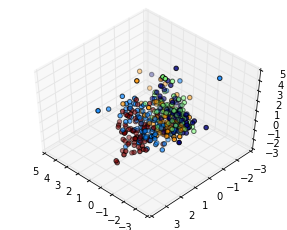

In [35]:
fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(df_red[:, 0], df_red[:, 1], df_red[:, 2], c=position_labels)

<h4 class = "alert alert-warning"/> 2D plotting

In [36]:
statesN = [0,1,2,3,4]
states = [invdict[x] for x in statesN]
states

[' PG', ' PF', ' SG', ' SF', ' C']

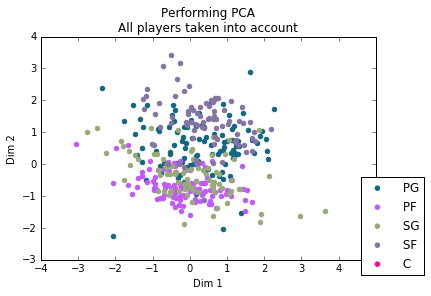

<Container object of 10 artists>

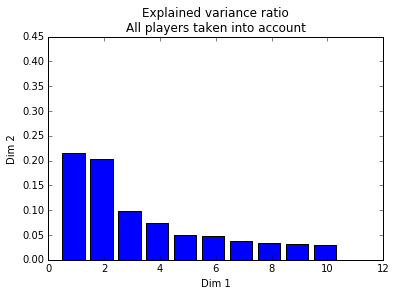

In [37]:
import matplotlib.patches as mpatches
pylab.title("Performing PCA\nAll players taken into account")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
#pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)

states = [invdict[x] for x in [0,1,2,3,4]]
for i,l in enumerate(states):
    x = []
    y = []
    for j,_ in enumerate(df_red[:, 0]):
        if position_labels[j] == i+1:
            x.append(df_red[j,0])
            y.append(df_red[j,1])
    pylab.scatter(x,y,label=l,color = np.random.rand(3,1) )

pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
pylab.show()


pylab.title("Explained variance ratio\nAll players taken into account") 
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
pylab.ylim(0,.45)
x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
pylab.bar(x_axis,pca.explained_variance_ratio_)

In [38]:
#taking a look to the columns
columns = ["col "+str(i) for i in range(1,len(df_red[0])+1)]
pca_df = pd.DataFrame(data=df_red, columns=columns)
pca_df.head(10)

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10
0,-0.595848,-0.934963,0.104691,0.169865,-0.765549,0.159997,1.377552,-0.159006,-0.794430,-1.086550
1,-0.169809,0.852145,-0.677376,0.155091,1.774971,-0.143432,-0.744135,-0.182758,-0.388244,0.073335
2,1.536729,-0.817092,0.811289,-1.006231,0.994237,0.835082,-2.474036,0.373792,0.325113,-0.585396
3,0.953202,0.017300,0.078295,-0.236814,0.549260,0.190637,0.637477,-1.274691,-1.058777,-1.453079
4,-0.956946,0.615921,-1.239756,0.707668,-0.026026,0.631632,0.500751,0.291353,0.446119,-0.141802
5,-0.109890,1.335825,0.111597,0.657706,-0.968286,0.240763,0.361420,0.583172,1.667319,-0.265172
6,-0.500431,-0.058933,-1.156512,0.176873,0.857191,0.468962,-0.620915,-0.543618,-0.129657,-0.487209
7,0.610294,-0.983646,0.310782,0.668784,-1.679593,0.756240,-0.865937,-1.265316,1.120392,0.116281
8,1.616085,2.898100,2.533721,-0.314961,-0.495127,1.036029,-2.253023,-1.954627,-1.825920,-2.829181
9,-0.694927,-0.165721,1.377256,0.172063,-0.268242,-0.885850,-0.901610,0.047903,0.797617,0.776090


<h4 class = "alert alert-warning">Repeting the previous PCA taking into account only two different positions </h4>

In [39]:
# Function that does the previous steps
def PCAForFewPositions (states, dim1 = 1, dim2 = 2, verbose = 0, n_comp = 10,corrCircle = False):
    dict = {' PG': 0, ' PF': 1, ' SG' : 2, ' SF' : 3, ' C' : 4}
    invdict = {v: k for k, v in dict.iteritems()}

    posic2 = []
    for x in df['PosicAbbrev']:
        if x in states :
            posic2.append(dict[x])

    #df2 = df[df['PosicAbbrev'].isin((' SG',' PF',' SF'))]
    df2 = df[np.in1d(np.array(position_labels),states)]

    df_numVar_C_PG = df2.select_dtypes(include=['number'])

    if verbose > 1:
        print len(posic2)
        print df2.shape

    df_scaled_C_PG = sk.preprocessing.scale(df_numVar_C_PG)

    pca = sk.decomposition.PCA(n_components= n_comp)
    df_red_C_PG = pca.fit_transform(df_scaled_C_PG)

    if verbose >0:
        print pca.explained_variance_ratio_
        print "variance sum =",sum(pca.explained_variance_ratio_)

    pcaTitle ="Performing PCA"
    title = "\n Considering only players having the following positions: "

    for i in range(len(states)):
        title = title + invdict[states[i]]
        if i < len(states) - 1:
            title += ", "

    #ploting scatterplot in new dimensions
    pylab.title(pcaTitle + title)
    pylab.xlabel("Dim " + `dim1`)
    pylab.ylabel("Dim " + `dim2`)
    #pylab.scatter(df_red_C_PG[:, dim1-1], df_red_C_PG[:, dim2-1], c=posic2)
    
    statesName = [invdict[x] for x in states]
    for i,s in enumerate(states):
        x = []
        y = []
        for j,_ in enumerate(df_red[:, dim1]):
            if position_labels[j] == s:
                x.append(df_red[j,dim1-1])
                y.append(df_red[j,dim2-1])
        pylab.scatter(x,y,label = statesName[i],color = np.random.rand(3,1))
    
    pylab.legend(loc='upper center', bbox_to_anchor=(1.05, .4) ,scatterpoints = 1)
    pylab.show()
    
    #plotting explained veriance
    if verbose > -1:
        pylab.title("Explained variance ratio" + title)
        pylab.xlabel("Dim 1")
        pylab.ylabel("Dim 2")
        pylab.ylim(0,.45)
        x_axis =[x+.5 for x in range(len(pca.explained_variance_ratio_))]
        pylab.bar(x_axis,pca.explained_variance_ratio_)
        plt.show()
    
    #plt.bar(range(10),np.cumsum(varArray))
    
    #Plot circle of correlations
    if corrCircle:
        corr_coordinates = np.corrcoef(np.transpose(sk.preprocessing.scale(df_red_C_PG)),
                                       np.transpose(df_scaled_C_PG))[n_comp:,range(n_comp)]
        ebouli = pd.Series(pca.explained_variance_ratio_)
        cols = ['Dim-'+str(x) for x in range(len(ebouli))]
        corr_coordinates = pd.DataFrame(corr_coordinates,
                                        columns=cols, index=df_numVar_C_PG.columns)
        # Plotting circle
        plt.figure(figsize=(20,20))
        plt.Circle((0,0),radius=1, color='g', fill=False)
        circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
        fig = plt.gcf()
        fig.gca().add_artist(circle1)
        for idx in range(len(corr_coordinates["Dim-0"])):
            x = corr_coordinates["Dim-0"][idx]
            y = corr_coordinates["Dim-1"][idx]
            plt.arrow(0.0,0.0,x,y,'k')
            #plt.plot([0.0,x],[0.0,y],'k-')
            #plt.plot(x, y, 'rx')
            plt.annotate(corr_coordinates.index[idx], xy=(x,y),fontsize = 30)
        plt.plot([-1.1,1.1], [0,0],'k--')
        plt.plot([0,0], [-1.1,1.1],'k--')
        plt.xlabel("Dim 1 (%s%%)" % str(ebouli[0])[:4].lstrip("0."),fontsize = 30)
        plt.ylabel("Dim 2 (%s%%)" % str(ebouli[1])[:4].lstrip("0."),fontsize = 30)
        plt.xlim((-1.1,1.1))
        plt.ylim((-1.1,1.1))
        plt.title("Circle of Correlations",fontsize = 50)
            
    return pca

[ 0.26849044  0.22285327  0.09154992  0.06152752  0.05505833  0.04184109
  0.0398894   0.02834594  0.02626213  0.02339164]
variance sum = 0.859209683945


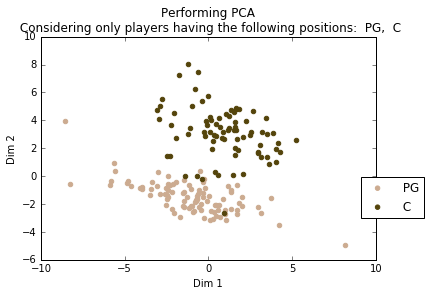

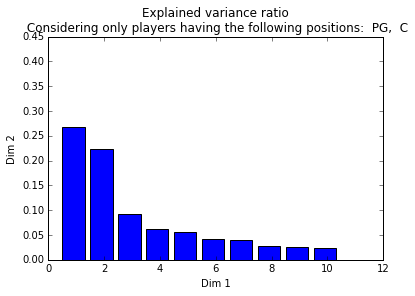

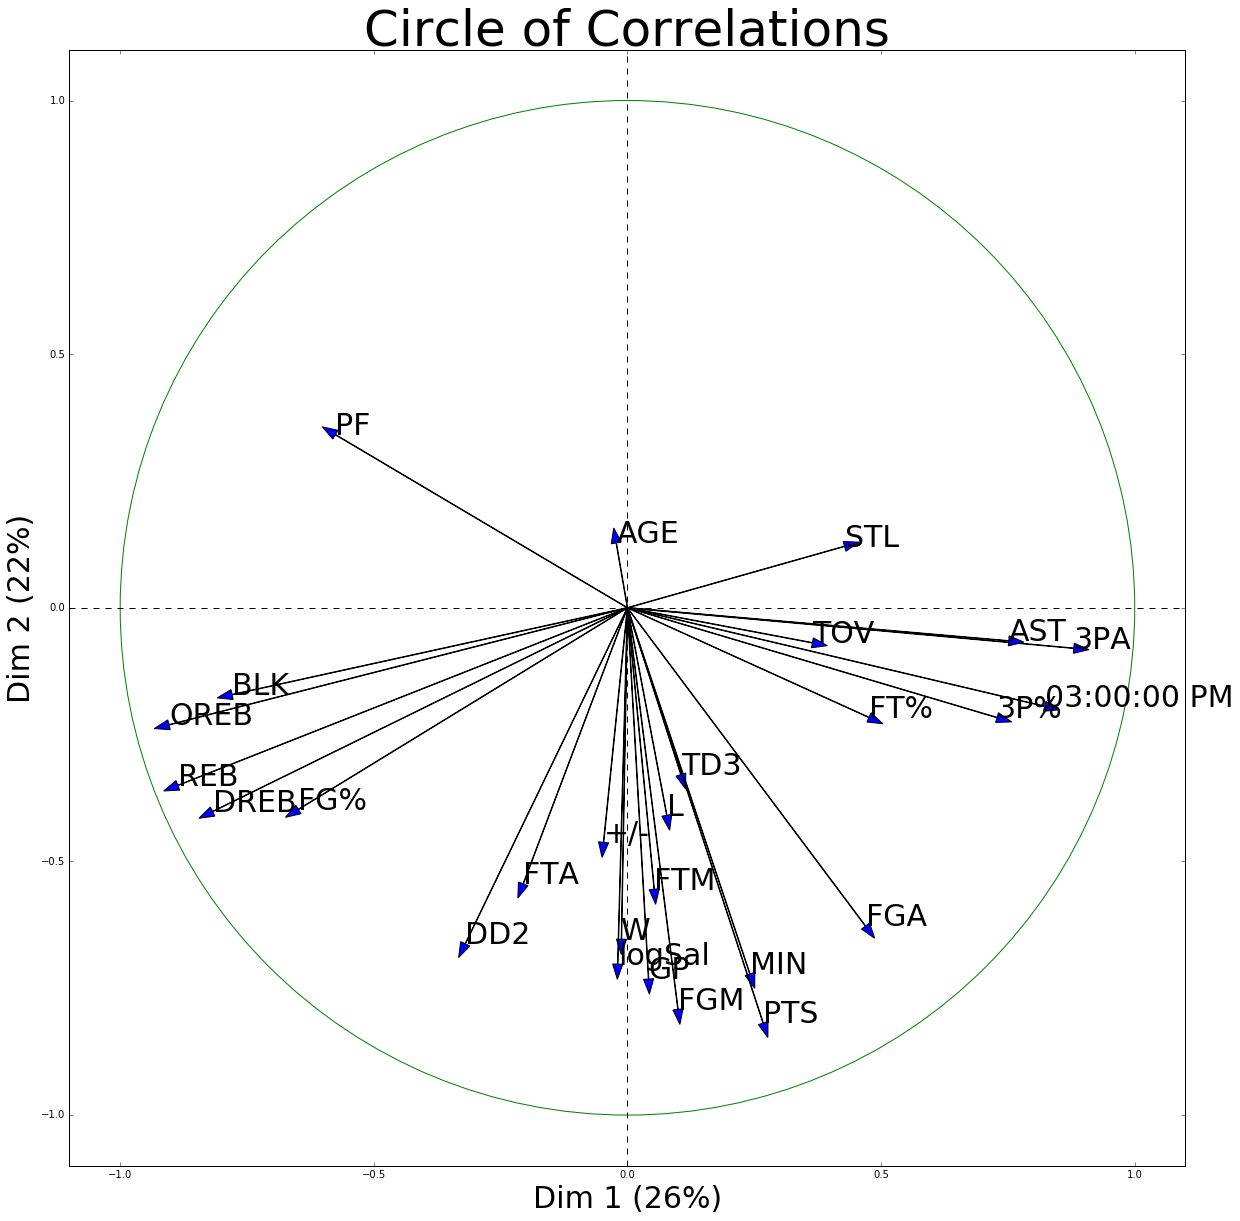

In [51]:
# change the "states" array to set the positions you whant to take into account
states = [0,4]
pca = PCAForFewPositions(states, verbose =1,corrCircle=True)

#M = pca.get_covariance()
#eigVal,eigVec = np.linalg.eig(M)
#eigVal/sum(eigVal)
#eigVec[:,0:2]

[ 0.26849044  0.22285327  0.09154992  0.06152752  0.05505833  0.04184109
  0.0398894   0.02834594  0.02626213  0.02339164]
variance sum = 0.859209683945


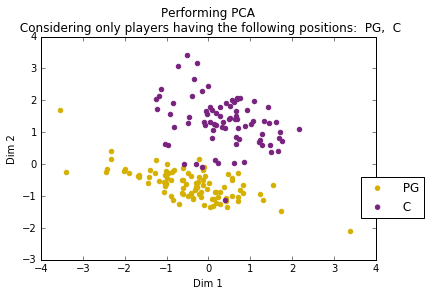

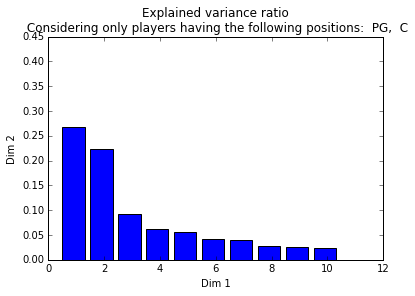

In [41]:
states = [0,4]
pca = PCAForFewPositions(states, verbose = 1)

<h4 class = "alert alert-warning">Plotting circle of dependencies between the original featuresand the new components</h4>

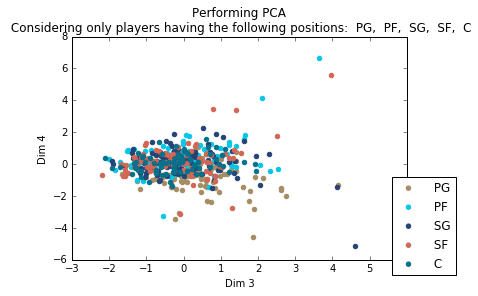

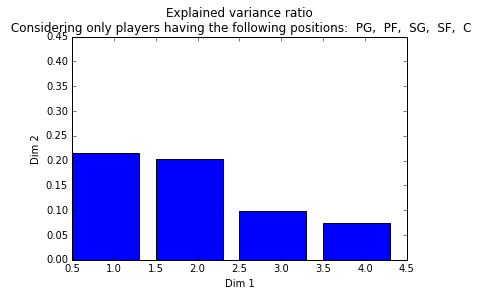

In [42]:
states = [0,1,2,3,4]
pca = PCAForFewPositions(states=states,dim1 = 3, dim2 = 4,n_comp=4)

<h2 class="alert alert-success">
     Correlation Graph
</h2>

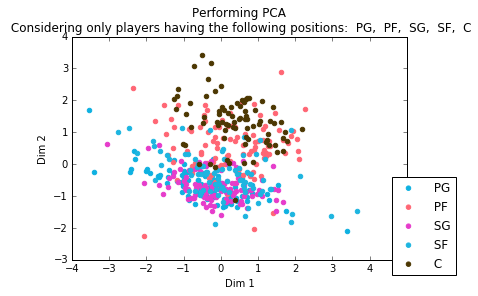

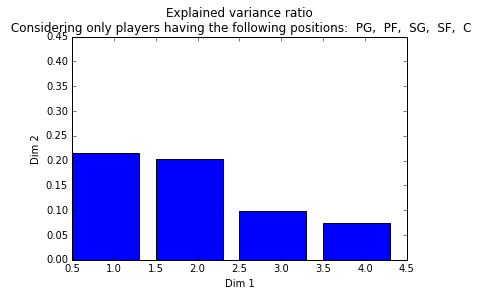

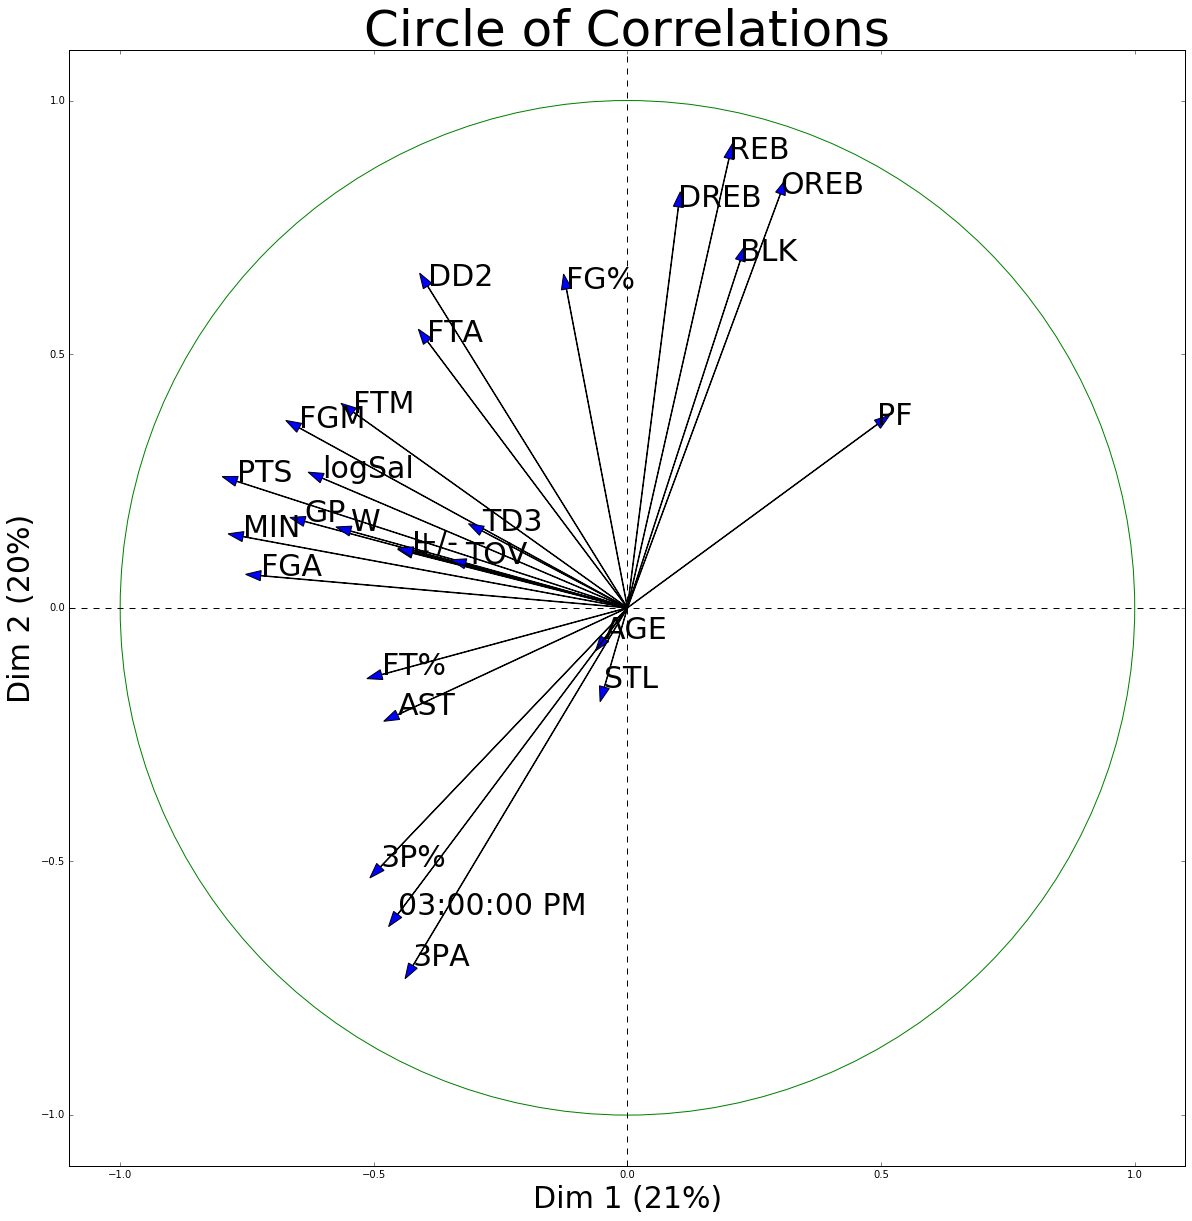

In [43]:
#import corrGraph.analysis as ana

#ana.myPCA(df=pd.DataFrame(df_numVar))
states = [0,1,2,3,4]
pca = PCAForFewPositions(states=states,dim1 = 1, dim2 = 2,n_comp=4,corrCircle=True)

<h2 class="alert alert-success">
        ANALYSIS
</h2>

In this first phase of the analysis, we performed several Principal Component Analysis' (PCA's) from our scaled dataset in order to visualize some of the information contained in it. During this phase, we based our analysis on the "preconceived" position labels in modern basketball (Center, Power Forward, Small Forward, Shooting Guard and Point Guard) in order to see if our variables were representative of these positions. This way, we could evaluate, empirically, the potential of our dataset for challenging this predefined labels and, therefore, be able to propose new classifications.

We performed a PCA over a dataset with 29 features, listed on (POINT TO WHERE THEY'RE LISTED). An interesting remark is that we chose to use store in the dataset the logarithm with base 10 of the player salaries, instead of using the actual salaries itself. This choice was motivated by the exponential shape of the salary distribution, showed in figure (below). The graph on the left hand side shows the salary versus the people who earn it, in an increasing fashion (this was plot in the same way it is done to calculate the gini coefficient). A similar graph is shown on the right, but taking the log with base ten of the salries on the y axis. we can see that, except for the fifty first players, the data transformed in the logarithm bases is much closer to linear than the original feature was.Based on the fact that PCA is a linear method, we chose the salaries in the logarithm scale in order to better represent it's variability. 
    

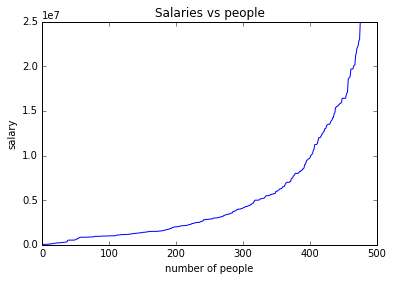

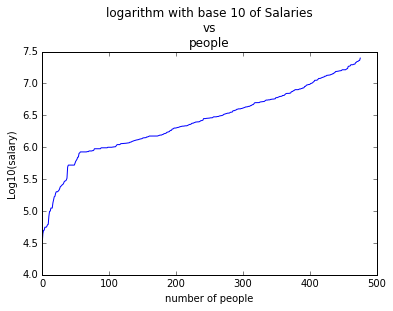

In [44]:
pylab.title("Salaries vs people") 
pylab.xlabel("number of people")
pylab.ylabel("salary")
pylab.plot(sorted(sal.as_matrix()))
pylab.show()

pylab.title("logarithm with base 10 of Salaries\nvs\npeople") 
pylab.xlabel("number of people")
pylab.ylabel("Log10(salary)")
pylab.plot(np.log10(sorted(sal.as_matrix())))
pylab.show()

The PCA performed in figure X shows that the positions can be partially identified visually even when taking into account only the two main dimensions of the PCA (that is, the dimensions that represent the best the variability in the data). We, however, noticed the second dimension of the PCA is the main responsible for the identification of a player position, while the first component reveals other kind of information. The other components (third and fourth dimentions for example, as it is shown in the figure Y) do very little regarding the visualisation of the players positions.

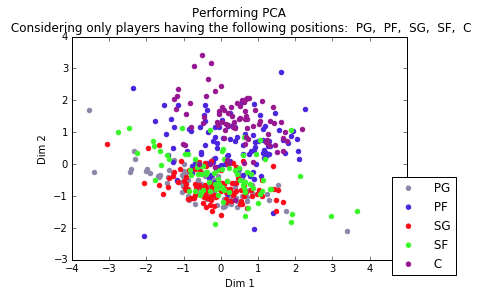

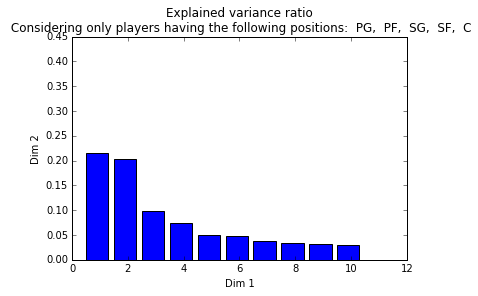

In [45]:
pca = PCAForFewPositions(states = [0,1,2,3,4])

From the figure X (above), we can see, that positions where the player tends to attack more (Center and Power Forrwards for example) have greater values of Dim 2, while more defensive players (such as Point Guards, for example) have a less important values of the second dimension. This separation becomes more clear when perfoming the PCA taking into account only players that have extrimely different roles in the field, as it was done in the figure X (below).

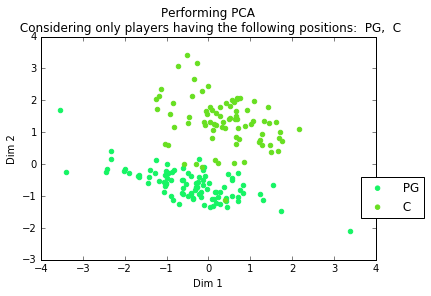

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [46]:
PCAForFewPositions(states = [0,4], verbose= -1)

In order to see the correlation between the variables, we also plotted the correlation map (also called variables factor map), shown in Figure X. It contains, for each feature, its correlation to the dimensions one and two, represented as coordinates x and y, respectively. This graph allowed us to better understand which variables played a more important role for each dimension of the PCA, and thus confirm our analysis regarding the second dimension of tha PCA.

We can see that the features most correlated to the second dimension tend to concern, not only their role of defensive player or "attackant", but principally to the position of the player in the field. For example, the number of blocks made and rebounds (taken by a player tends to be greater if he occupies positions situated further from the goal, such as Point Guards and shooting Guards. As thes variables contribute negatively to the second dimension of the PCA, the least blocks the player does, the greater will tend to be its second composition, and, as those who do more blocks are normally in defensive positions, 
this further distance from the goal can be related to a defensive way of playing,

We can also draw conclusions regarding the first component of the PCA. We can see that the components most related to it concern mostly the number of points or goals made. We can, then infer that this component is related to the abillity of the player itself, that is, "independently" of his position on the field, how many points he can make and how can he make his team win.

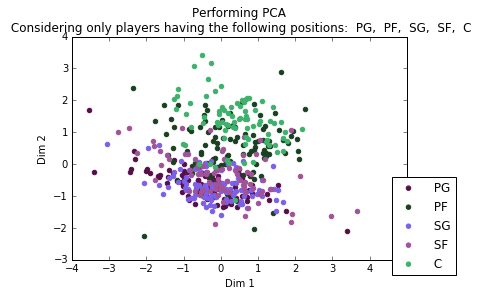

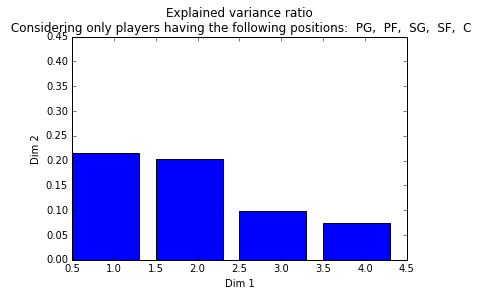

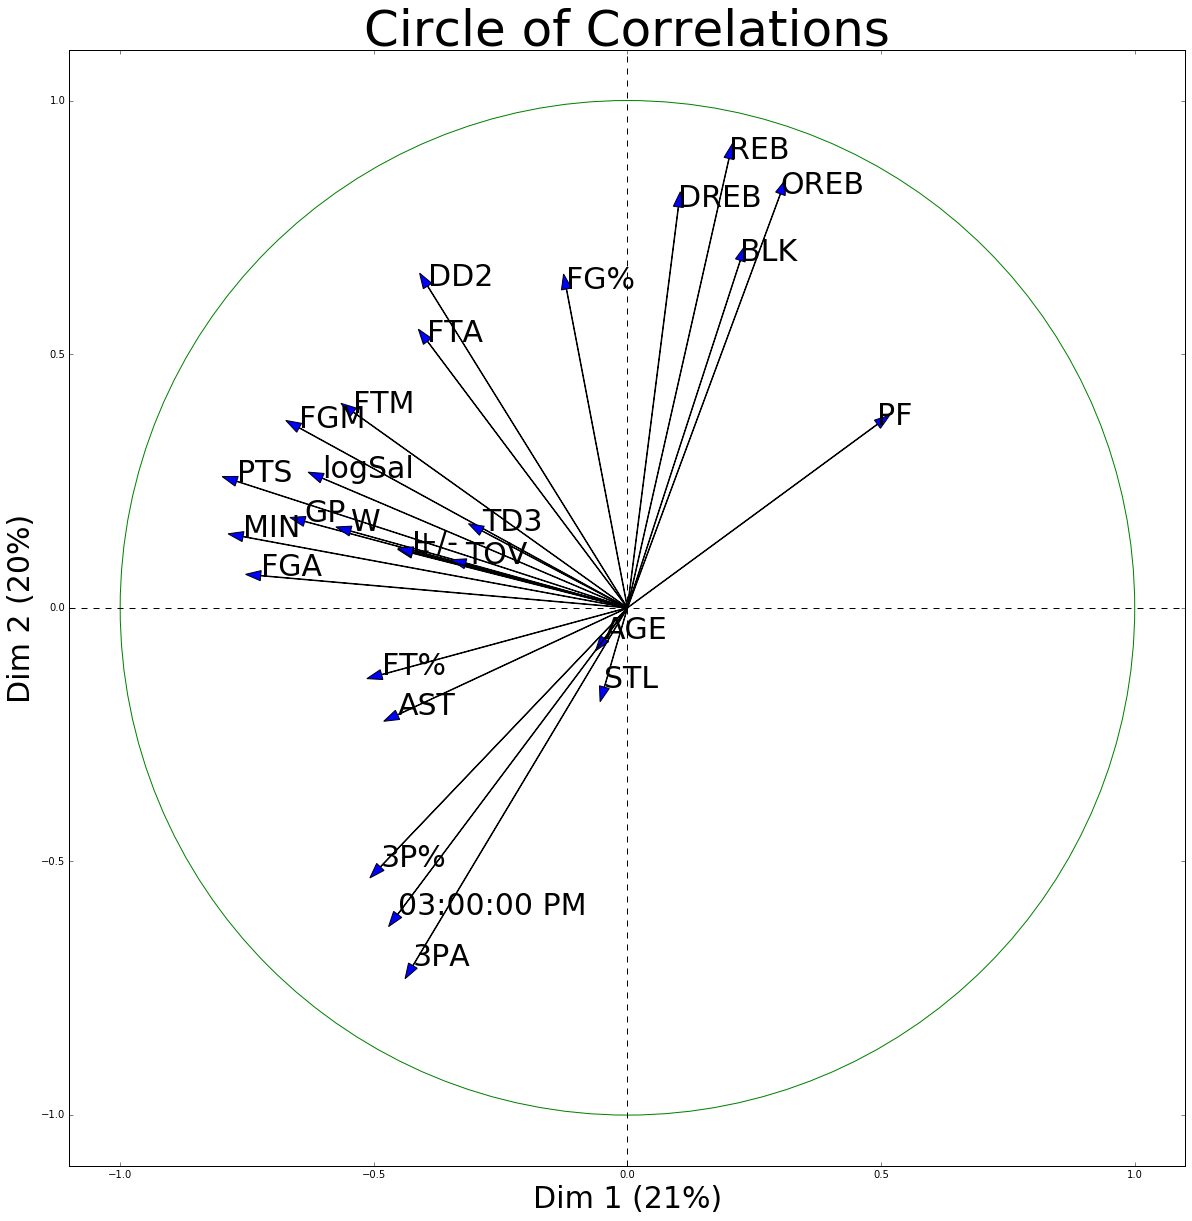

In [47]:
states = [0,1,2,3,4]
pca = PCAForFewPositions(states=states,dim1 = 1, dim2 = 2,n_comp=4,corrCircle=True)

![title](images/PCAFactorMap.jpg)

Source: https://madridbasketball.wordpress.com/2014/12/25/understanding-basketball-positions/

![title](images/BasketPositions.gif)

In order to confirm that "suspeita", we plotted the PCA coloring the players based on their salaries, making the suposition that the salaries reflect their abilities. Again, we only have had good results when using the salaries logarithm scale, so that their closer to a linear coloration. The result of this plot is shown in figure X. The correlation coeficient of 71.5 % between Dimension one and the salaries (represented in the correlation map) also confirms that this dimensions concerns the abilities of the players.

We can see clearly that players with smaller salaries have smaller values of dimension one.
We can now take another look to the figure Y (PCA colored by positions) and try to explain  the reason why, for low values of Dimension one, it becomes difficult to differentiate the positions. The explaation may rely o the fact that, the ability of those players would not allow a clear differentiation between ways to play. This may be also why, When we go to the most well paid players (sopposelly the ones with more abillity), the difference of positions becomes very clear.

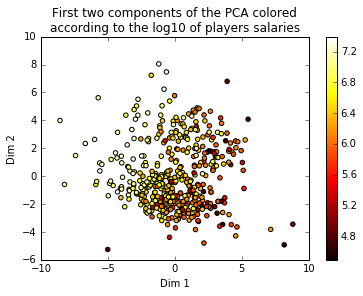

In [48]:
df_numVar = df.select_dtypes(include=['number'])
df_scaled = sk.preprocessing.scale(df_numVar)
pca = sk.decomposition.PCA(n_components=10)
df_red = pca.fit_transform(df_scaled)

colors = df['logSal']
#colors = sal
pylab.title("First two components of the PCA colored\naccording to the log10 of players salaries")
pylab.xlabel("Dim 1")
pylab.ylabel("Dim 2")
pylab.scatter(df_red[:,0],df_red[:,1], c = colors, cmap = 'hot')
pylab.colorbar()
pylab.show()

In [49]:
np.corrcoef(df['logSal'],df_red[:,0])

array([[ 1.        , -0.60186774],
       [-0.60186774,  1.        ]])

<div class="alert alert-danger">
<h2>
Backup (not used)
</h2>
</div>

    
<div class="alert alert-success">
<h2>
Performing MDS (still dim. reduction)
</h2>
</div>

      col 1     col 2     col 3     col 4     col 5     col 6
0 -0.247034  2.066194 -0.687200  1.060658  1.129191 -2.305970
1  0.375682  0.643278  0.103051 -2.162686 -0.422499  2.440028
2 -4.208800 -3.207816 -0.576662  2.215363  0.492459 -0.313050
3 -2.847934 -0.761449 -0.057669 -0.151297 -1.308794  0.964228
4  2.285466  2.785685  1.223036 -0.793457 -0.170750  1.049219


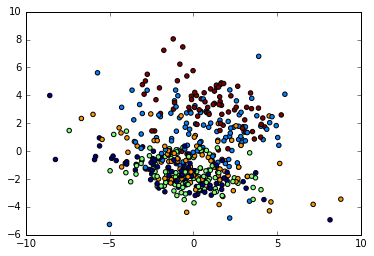

In [50]:
from sklearn.manifold import MDS
mds = MDS(n_components=6, metric=True, random_state=42, dissimilarity='euclidean')
mds_array = mds.fit_transform(df_scaled)

columns = ["col "+str(i) for i in range(1,len(mds_array[0])+1)]
mds_df = pd.DataFrame(data=mds_array, columns=columns)
print(mds_df.head())

pylab.scatter(df_red[:, 0], df_red[:, 1], c=position_labels)
pylab.show()

<h1> Alerts Example</h1>

<div class="alert alert-success">
<h2>
Submit successfully!
</h2>
</div>

<div class="alert alert-info">
For more updates visit our offical forum.
</div>

<div class="alert alert-danger">
Error
</div>

<div class="alert alert-warning"> 
Don't use caps keys.
</div>